# The main task is answer a question which data (columns) have the most impact on decision if the client will subscribe a term deposit.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
traindata = pd.read_csv('bank-full.csv', index_col = False)
testdata = pd.read_csv('bank.csv', index_col = False)

In [91]:
traindata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [92]:
testdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Changing some columns name into more understanding expressions

In [93]:
new_columns_name = {"default": "default_credit",
                   "day": "contact-dayofmonth",
                   "month": "contact-month",
                   "duration": "contact-duration",
                   "pdays": "past_days_call",
                   "previous": "contacts_before_campaign",
                   "poutcome": "outcome_previous_campaign",
                   "y": "term_deposit"}

traindata = traindata.rename(columns = new_columns_name)
testdata = testdata.rename(columns = new_columns_name)

### Checking for any inproper or missing data

In [94]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job                        45211 non-null  object
 2   marital                    45211 non-null  object
 3   education                  45211 non-null  object
 4   default_credit             45211 non-null  object
 5   balance                    45211 non-null  int64 
 6   housing                    45211 non-null  object
 7   loan                       45211 non-null  object
 8   contact                    45211 non-null  object
 9   contact-dayofmonth         45211 non-null  int64 
 10  contact-month              45211 non-null  object
 11  contact-duration           45211 non-null  int64 
 12  campaign                   45211 non-null  int64 
 13  past_days_call             45211 non-null  int64 
 14  contac

In [95]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        4521 non-null   int64 
 1   job                        4521 non-null   object
 2   marital                    4521 non-null   object
 3   education                  4521 non-null   object
 4   default_credit             4521 non-null   object
 5   balance                    4521 non-null   int64 
 6   housing                    4521 non-null   object
 7   loan                       4521 non-null   object
 8   contact                    4521 non-null   object
 9   contact-dayofmonth         4521 non-null   int64 
 10  contact-month              4521 non-null   object
 11  contact-duration           4521 non-null   int64 
 12  campaign                   4521 non-null   int64 
 13  past_days_call             4521 non-null   int64 
 14  contacts

### There is no need to change a structure/values of the tables (all values are corrected type and there are no missed data)

---

# **Statistic info**

## Compare basic stats in both datasets (training and testing).

In [96]:
traindata.describe()

,age,balance,contact-dayofmonth,contact-duration,campaign,past_days_call,contacts_before_campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [97]:
testdata.describe()

,age,balance,contact-dayofmonth,contact-duration,campaign,past_days_call,contacts_before_campaign
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Very good representation training data by testing data (their most important statistics parameters: **mean**, **std**, **median** have similar values).

---

## Looking for ***Pearson*** and ***Spearman correlation***

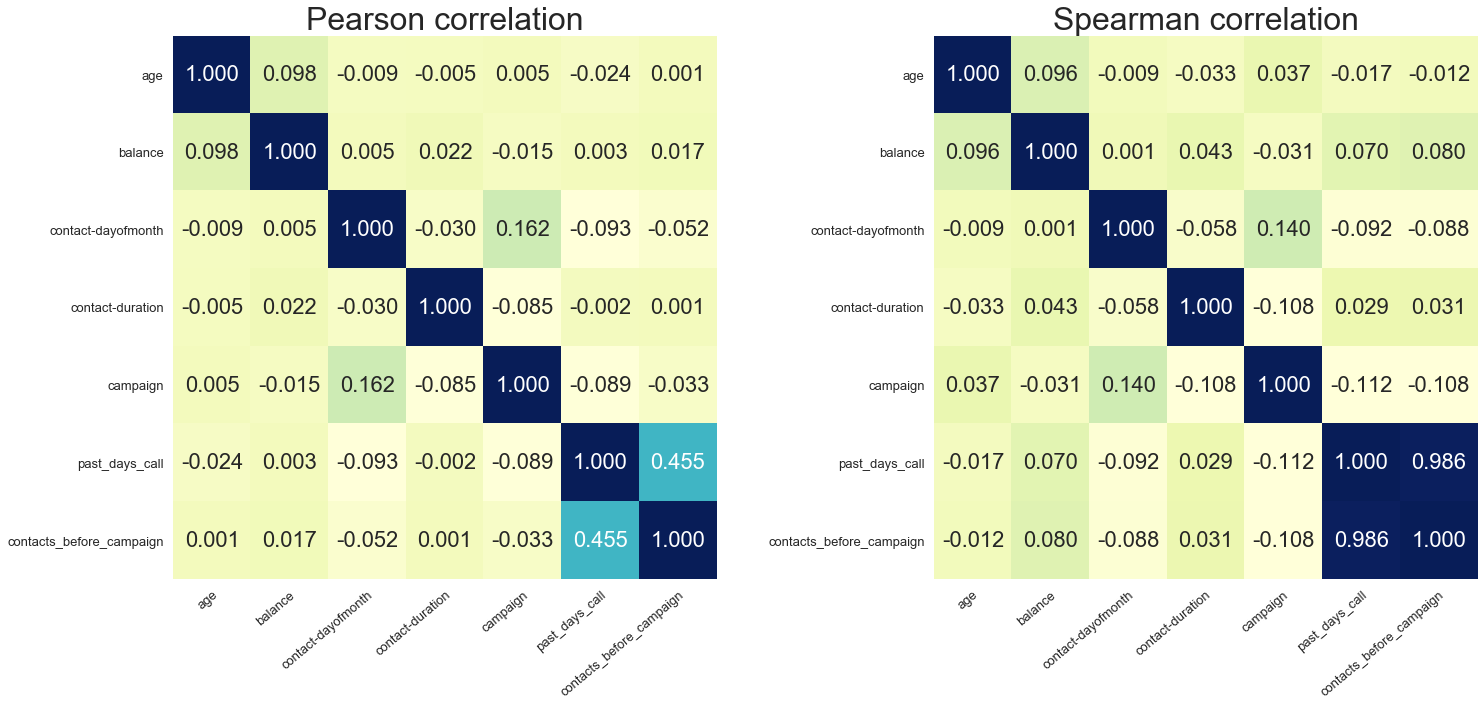

In [98]:
sns.set()

# Draw a heatmap with the numeric values in each cell
fig = plt.figure(figsize=(25, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax_ = [ax1, ax2]

correlation_data = [traindata.corr(method = 'pearson'), traindata.corr(method = 'spearman')]
titles_array = ['Pearson correlation', 'Spearman correlation']

# We use axs parameter to tell seaborn which subplot to use for this plot
for axs, data, titles in zip(ax_, correlation_data, titles_array):
    sns.heatmap(data = data, fmt = '.3f', square = True, cbar=False, cmap = "YlGnBu", annot = True, annot_kws = {"fontsize": 22}, ax = axs)
    axs.set_xticklabels(ax1.get_xticklabels(), rotation = 40, ha = "right", rotation_mode = "anchor", fontsize = 13)
    axs.set_yticklabels(ax1.get_xticklabels(), rotation = 0, ha = "right", rotation_mode = "anchor", fontsize = 13)
    axs.set_title(titles, fontsize = 32)

plt.show()

### High correlation between `contacts_before_campaign` and `past_days_call` (linear and non-linear) will be checking in plot - there is a chance to remove one of these features which will made future calculations much easier.

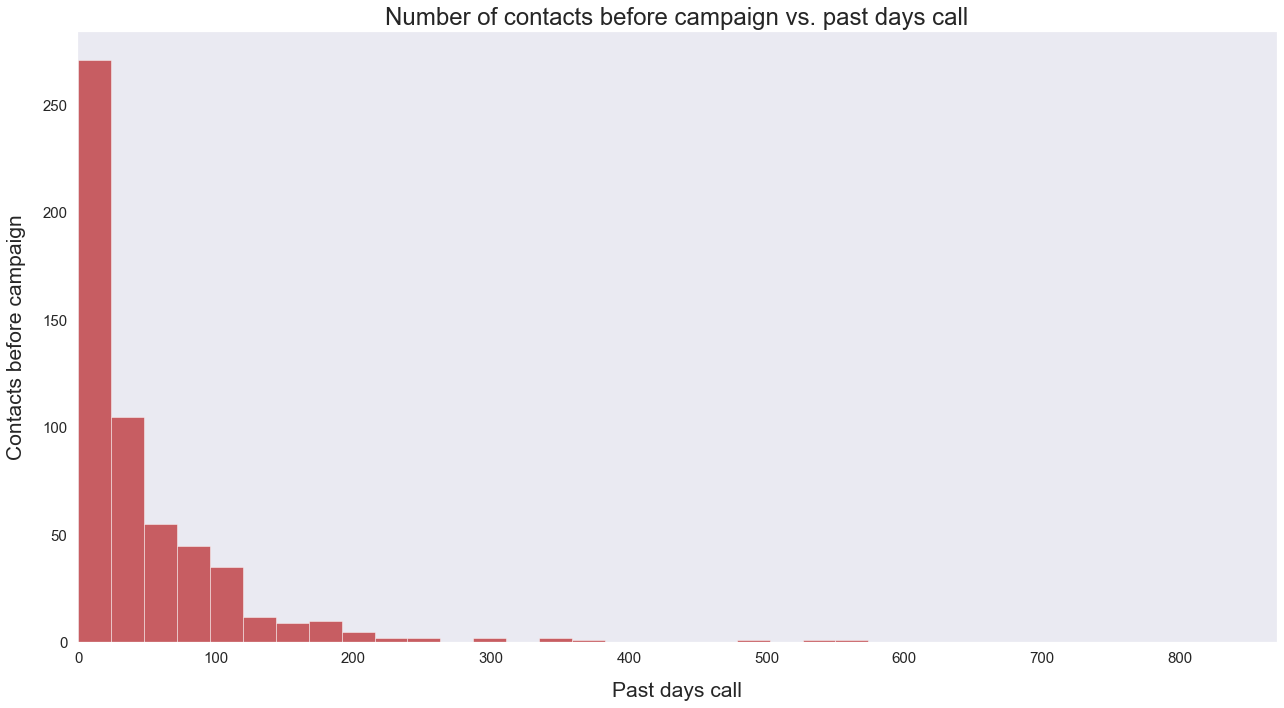

In [99]:
sum1 = traindata.groupby('past_days_call')['contacts_before_campaign'].sum()
x_num = np.math.ceil(np.sqrt(len(sum1)))

sns.set_style("dark")
f, ax = plt.subplots(figsize = (18, 10))

# Plot a histogram with aproximate function
plt.xlim(traindata['past_days_call'].min(), traindata['past_days_call'].max())
sns.distplot(sum1, kde=False, hist_kws={"linewidth": 0.5, "alpha": 0.9}, bins = x_num, color="r")
plt.xlabel('Past days call', labelpad = 16, fontsize = 21)
plt.ylabel('Contacts before campaign', labelpad = 16, fontsize = 21)
plt.title('Number of contacts before campaign vs. past days call', fontsize = 24)
ax.tick_params(labelsize = 15)

plt.tight_layout()

### Looking at the histogram shape we can agree that dependancy between these 2 variables is very high - it may be some of f=A*(1/x) function (where A > 0). 
### One of these columns is useless, but there is no clear way to find out which of them it should be deleted from the data.

### I decide to remove `'past_days_call'` from both tables.

In [14]:
traindata = traindata.drop('past_days_call', axis=1)
testdata = testdata.drop('past_days_call', axis=1)

***

## Visual representation of dependancies between numerical data columns and target class (`'term_deposit'`)

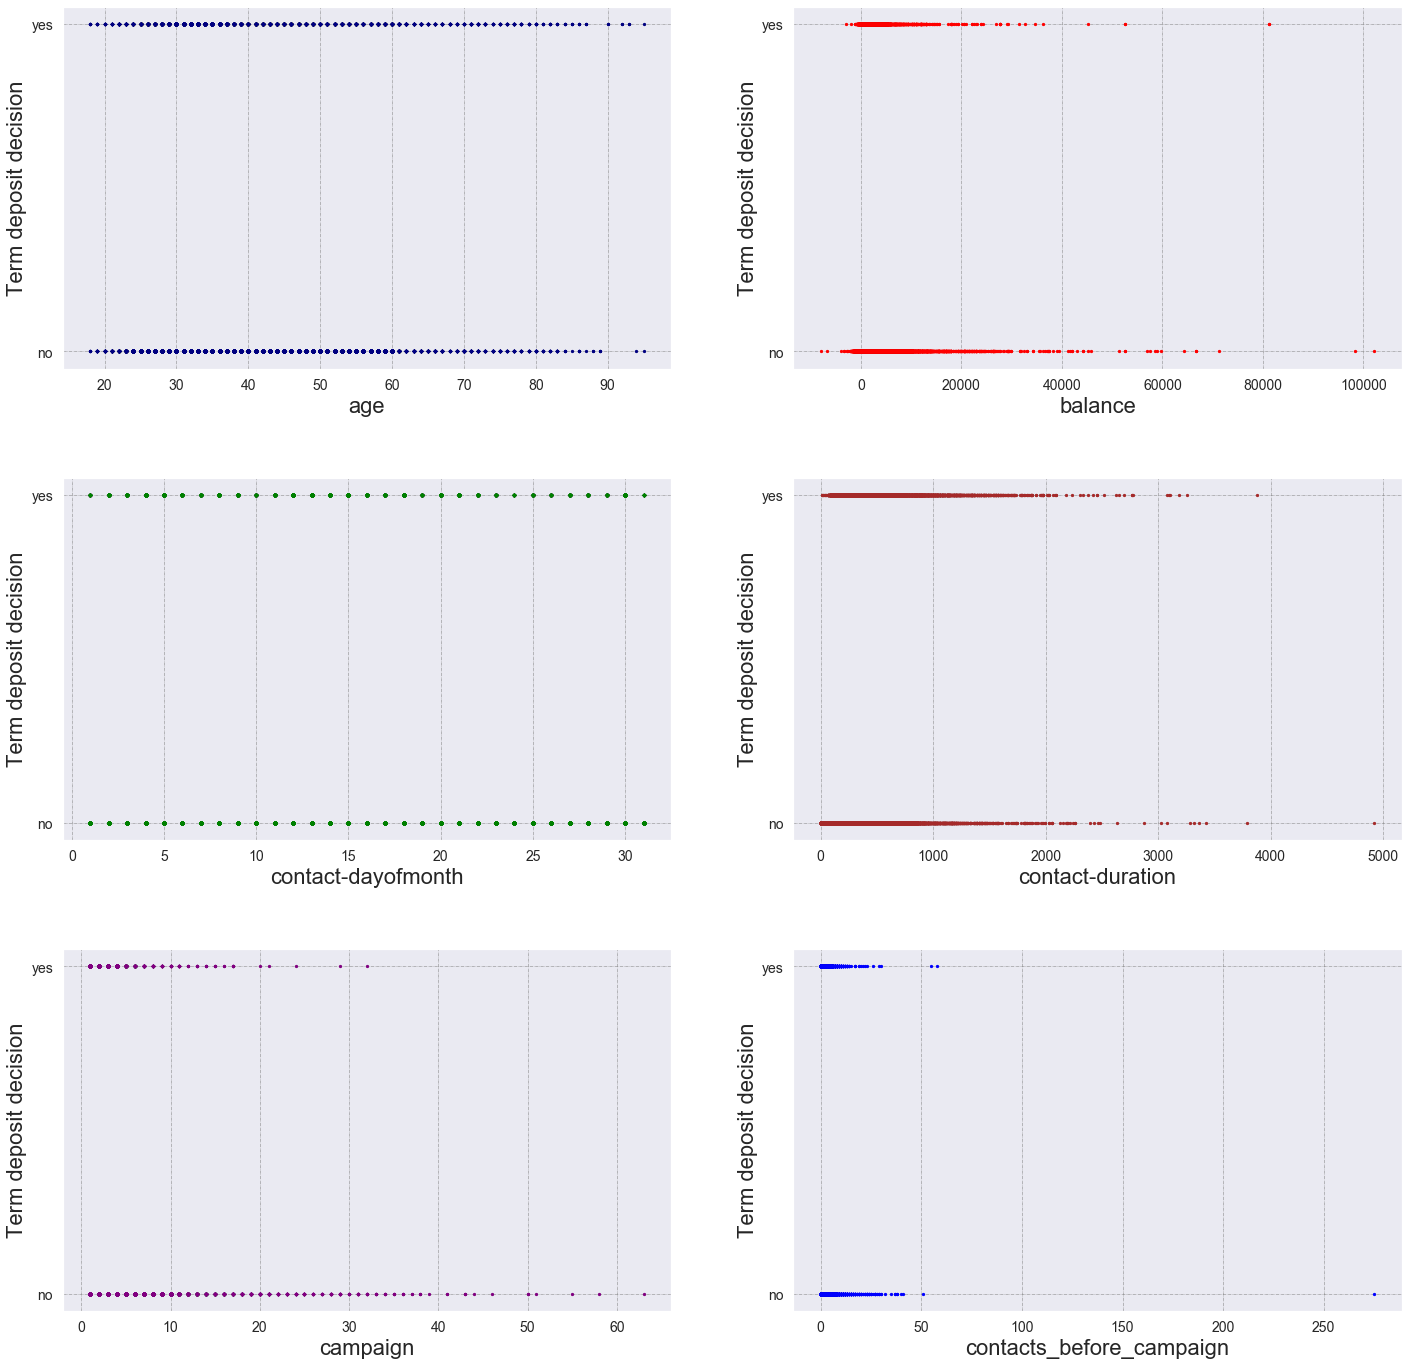

In [15]:
column_names = traindata.select_dtypes(include = 'number').columns
colors = ['navy', 'red', 'green', 'brown', 'purple', 'blue']

fig, ax = plt.subplots(3, 2, figsize=(24, 24))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plots = [ax[i, j] for i in range(0, 3) for j in range(0, 2)]

for column, colors, axs in zip(column_names, colors, plots):
    ## 2-D plots array
    axs.scatter(traindata[column], traindata['term_deposit'], c = colors, s = 5)
    axs.set_xlabel(column, fontsize = 22)
    axs.set_ylabel('Term deposit decision', fontsize = 22)
    axs.tick_params(labelsize = 14)
    axs.grid(color = 'grey', linestyle = '-.', linewidth = 0.5)
    
plt.show()

### There are no clear dependancy between ***any x-axis data*** and `'term-deposit'` values (`'yes'`/`'no'` decision). The `'balance'` and `'age'` columns will be checking more closely, because results from these plots are... suspected. 
### Let's dive in:

In [16]:
traindata.groupby('term_deposit')['balance'].count()

term_deposit
no     39922
yes     5289
Name: balance, dtype: int64

In [17]:
traindata.groupby('term_deposit')['age'].count()

term_deposit
no     39922
yes     5289
Name: age, dtype: int64

### There are the same number of ***'yes'/'no'*** decisions for both columns (`'balance'` and `'age'`).

### We take a look at the 2 extreme cases:
- ***maximum balance when person did not get term deposit***,
- ***minimum balance when person did get term deposit***.

In [18]:
## First option (looking for max balance value with 'no' decision)
no_decision = traindata[traindata['term_deposit'] == 'no']
no_decision_max_balance = no_decision['balance'].max()


## Second option (looking for min balance value with 'yes' decision)
yes_decision = traindata[traindata['term_deposit'] == 'yes']
yes_decision_min_balance = yes_decision['balance'].min()

### Searching in the table **traindata** above 2 results

In [19]:
traindata[(traindata['balance'] == no_decision_max_balance) | (traindata['balance'] == yes_decision_min_balance)]

,age,job,marital,education,default_credit,balance,housing,loan,contact,contact-dayofmonth,contact-month,contact-duration,campaign,contacts_before_campaign,outcome_previous_campaign,term_deposit
32713,39,self-employed,married,tertiary,no,-3058,yes,yes,cellular,17,apr,882,3,0,unknown,yes
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,0,unknown,no


### Which other things could be the reasons of making ***'yes'***/***'no'*** term deposit decisions by bank?

### From directly comparison 2 rows (indexes) we can get the most important difference which maybe had the biggest impact on final decision. There are:
- 'job',
- 'marital',
- 'housing',
- 'loan',
- 'contact-duration',
- 'campaign'.

---

# **Classification methods**

## Using algorithms we will be looking for dependencies between data in column `'term_deposit'` and the rest of data in the table.

In [20]:
from sklearn import preprocessing, metrics
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Train and test data are divided into X (dependancy part) and y ('term_deposit')
X_train = traindata.drop('term_deposit', axis = 1)
y_train = traindata['term_deposit']
X_test = testdata.drop('term_deposit', axis = 1)
y_test = testdata['term_deposit']

numeric_features = traindata.select_dtypes(include = 'number').columns
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

categorical_features = traindata.select_dtypes(exclude = 'number').columns.drop('term_deposit')
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.

## **1. LogisticRegression**

### It is the simplest and quite effective algorythm - it will be used as a 'reference point' for the later, more complex methods.

In [21]:
from sklearn.linear_model import LogisticRegression

clf = Pipeline(steps = [('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter = 1000))])
clf.fit(X_train, y_train)
print("Model score for LogisticRegression = {0:.3f}".format(clf.score(X_test, y_test)))

Model score for LogisticRegression = 0.902


#### Very good result achieved by using algorythm without changing default parameters values (*`max_iter` increased only because of program warnings*).

## **2. KNeighborsClassifier**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# only odd 'knn' values from 3 to 15 (odd number never give a tie result using distance calculating by this algorythm)
knn_number = np.arange(3, 16, 2)
knn_array = []

print("For KNeighborsClassifier: \n")

def NearestNeighbors(knn_number):
    clf = Pipeline(steps = [('preprocessor', preprocessor),
                          ('classifier', KNeighborsClassifier(n_neighbors = knn_number))])
    y_knn_pred = clf.fit(X_train, y_train).predict(X_test)
    acc_score = metrics.accuracy_score(y_test, y_knn_pred)
    knn_array.append([acc_score, knn_number])
    print("Accuracy score = {0:.3f} (knn = {1:d})".format(acc_score, knn_number))
    return knn_array
    
NearestNeighborsResults = list(map(lambda x: NearestNeighbors(x), knn_number))

For KNeighborsClassifier: 

Accuracy score = 0.930 (knn = 3)
Accuracy score = 0.918 (knn = 5)
Accuracy score = 0.913 (knn = 7)
Accuracy score = 0.912 (knn = 9)
Accuracy score = 0.910 (knn = 11)
Accuracy score = 0.910 (knn = 13)
Accuracy score = 0.909 (knn = 15)


In [24]:
knn_accuracy_results = np.array(NearestNeighborsResults[0])
knn_accuracy_results

## Max value of accuracy score in %
knn_accuracy_max = np.array(np.where(knn_accuracy_results[:, 0] == knn_accuracy_results[:, 0].max()))

print("Max accuracy score = {0:.1f}% for knn = {1:.0f}".format(knn_accuracy_results[knn_accuracy_max[0][0], 0] * 100, knn_accuracy_results[knn_accuracy_max[0][0], 1]))

Max accuracy score = 93.0% for knn = 3


## **3. RidgeClassifier**

In [25]:
from sklearn.linear_model import RidgeClassifier
from functools import reduce
import itertools
from itertools import product

alphas = np.logspace(-5, 0, 6)
toler = np.logspace(-4, -1, 5)
solvers = np.array(['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
# 
res = np.array(list(itertools.product(solvers, alphas)))

print("For RidgeClassifier: \n")

def RidgeClass_results(res):
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RidgeClassifier(alpha = res[1], tol=0.001, class_weight=None, solver = res[0], max_iter = 25000, fit_intercept = True, random_state=200))])
    y_ridgeclass_pred = clf.fit(X_train, y_train).predict(X_test)
    print("Accuracy score = {0:.3f} (for solver '{1:s}' and alpha = {2:s})".format(metrics.accuracy_score(y_test, y_ridgeclass_pred), res[0], res[1]))

#  
Ridge_results_alpha = list(map(lambda x: RidgeClass_results(x), res))

For RidgeClassifier: 

Accuracy score = 0.897 (for solver 'auto' and alpha = 1e-05)
Accuracy score = 0.897 (for solver 'auto' and alpha = 0.0001)
Accuracy score = 0.897 (for solver 'auto' and alpha = 0.001)
Accuracy score = 0.897 (for solver 'auto' and alpha = 0.01)
Accuracy score = 0.897 (for solver 'auto' and alpha = 0.1)
Accuracy score = 0.897 (for solver 'auto' and alpha = 1.0)
Accuracy score = 0.897 (for solver 'svd' and alpha = 1e-05)
Accuracy score = 0.897 (for solver 'svd' and alpha = 0.0001)
Accuracy score = 0.897 (for solver 'svd' and alpha = 0.001)
Accuracy score = 0.897 (for solver 'svd' and alpha = 0.01)
Accuracy score = 0.897 (for solver 'svd' and alpha = 0.1)
Accuracy score = 0.897 (for solver 'svd' and alpha = 1.0)
Accuracy score = 0.897 (for solver 'cholesky' and alpha = 1e-05)
Accuracy score = 0.897 (for solver 'cholesky' and alpha = 0.0001)
Accuracy score = 0.897 (for solver 'cholesky' and alpha = 0.001)
Accuracy score = 0.897 (for solver 'cholesky' and alpha = 0.01)

## **4. NearestCentroid**

In [26]:
from sklearn.neighbors import NearestCentroid

shrink_range = np.logspace(-2, 0, 10)
metric_calc = ['euclidean', 'manhattan']
nearest_array = list(itertools.product(shrink_range, metric_calc))

print("In NearestCentroid: \n")

def Nearest_Centroid(nearest_array):
    clf = Pipeline(steps = [('preprocessor', preprocessor),
                  ('classifier', NearestCentroid(metric = nearest_array[1], shrink_threshold = nearest_array[0]))])
    clf.fit(X_train, y_train)
    y_NearestCentroid_pred = clf.predict(X_test)
    print("For metric '{0:s}'  accuracy score = {1:.3f} (shrink_threshold = {2:.3f})".format(nearest_array[1], metrics.accuracy_score(y_test, y_NearestCentroid_pred),
                                                                                             nearest_array[0]))

NearestCentroid_results = list(map(lambda x: Nearest_Centroid(x), nearest_array))

In NearestCentroid: 

For metric 'euclidean', accuracy score = 0.836 (shrink_threshold = 0.010)
For metric 'manhattan', accuracy score = 0.638 (shrink_threshold = 0.010)
For metric 'euclidean', accuracy score = 0.836 (shrink_threshold = 0.017)
For metric 'manhattan', accuracy score = 0.638 (shrink_threshold = 0.017)
For metric 'euclidean', accuracy score = 0.836 (shrink_threshold = 0.028)
For metric 'manhattan', accuracy score = 0.638 (shrink_threshold = 0.028)
For metric 'euclidean', accuracy score = 0.836 (shrink_threshold = 0.046)
For metric 'manhattan', accuracy score = 0.639 (shrink_threshold = 0.046)
For metric 'euclidean', accuracy score = 0.836 (shrink_threshold = 0.077)
For metric 'manhattan', accuracy score = 0.639 (shrink_threshold = 0.077)
For metric 'euclidean', accuracy score = 0.836 (shrink_threshold = 0.129)
For metric 'manhattan', accuracy score = 0.641 (shrink_threshold = 0.129)
For metric 'euclidean', accuracy score = 0.836 (shrink_threshold = 0.215)
For metric 'manh

## **5. Support vector machine (SVM)**

Because of too many parameters inside the SVM algorythm I will focus only on the 3 of them:
- C value (C = 1 is default),
- kernel type (linear, poly, rbf),
- 'gamma' value ('auto' is default).

In [27]:
from sklearn import svm
from sklearn.svm import SVC

In [28]:
##
c = np.arange(1, 6)

def SVC_C_param(c):
    for SVC_kernels in ('linear', 'poly', 'rbf'):
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(C = c, kernel = SVC_kernels, gamma = 'auto'))])
        y_svc_pred = clf.fit(X_train, y_train).predict(X_test)
        acc_score = metrics.accuracy_score(y_test, y_svc_pred)
        print("For C = {0:.0f} and kernel = {1:s}:".format(c, SVC_kernels))
        print("Accuracy result = {0:.3f}, (gamma = auto)".format(acc_score), "\n")
    return y_svc_pred


SVC_C_results = np.array([SVC_C_param(x) for x in c])

For C = 1 and kernel = linear:
Accuracy result = 0.893, (gamma = auto) 

For C = 1 and kernel = poly:
Accuracy result = 0.889, (gamma = auto) 

For C = 1 and kernel = rbf:
Accuracy result = 0.897, (gamma = auto) 

For C = 2 and kernel = linear:
Accuracy result = 0.893, (gamma = auto) 

For C = 2 and kernel = poly:
Accuracy result = 0.897, (gamma = auto) 

For C = 2 and kernel = rbf:
Accuracy result = 0.902, (gamma = auto) 

For C = 3 and kernel = linear:
Accuracy result = 0.893, (gamma = auto) 

For C = 3 and kernel = poly:
Accuracy result = 0.901, (gamma = auto) 

For C = 3 and kernel = rbf:
Accuracy result = 0.905, (gamma = auto) 

For C = 4 and kernel = linear:
Accuracy result = 0.893, (gamma = auto) 

For C = 4 and kernel = poly:
Accuracy result = 0.902, (gamma = auto) 

For C = 4 and kernel = rbf:
Accuracy result = 0.907, (gamma = auto) 

For C = 5 and kernel = linear:
Accuracy result = 0.893, (gamma = auto) 

For C = 5 and kernel = poly:
Accuracy result = 0.903, (gamma = auto) 



In [29]:
# 
c = np.arange(1, 6)
SVC_kernels = ['linear', 'poly', 'rbf']
params_SVC = np.array(list(itertools.product(SVC_kernels, c)))
SVC_result = []

print("For SVM Classifier (gamma = 'auto'): \n\n")

def SVC_C_param2(params_SVC):
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', SVC(C = params_SVC[1].astype('float'), kernel = params_SVC[0], gamma = 'auto'))])
    y_svc_pred = clf.fit(X_train, y_train).predict(X_test)
    acc_score = metrics.accuracy_score(y_test, y_svc_pred)
    SVC_result.append([acc_score, params_SVC[1].astype('float'), params_SVC[0]])
    print("For C = {0:s} and kernel '{1:s}', accuracy result = {2:.3f}:".format(params_SVC[1], params_SVC[0], acc_score))
    return SVC_result

SVC_C_results = list(map(lambda x: SVC_C_param2(x), params_SVC))

For SVM Classifier (gamma = 'auto'): 


For C = 1 and kernel 'linear', accuracy result = 0.893: 

For C = 2 and kernel 'linear', accuracy result = 0.893: 

For C = 3 and kernel 'linear', accuracy result = 0.893: 

For C = 4 and kernel 'linear', accuracy result = 0.893: 

For C = 5 and kernel 'linear', accuracy result = 0.893: 

For C = 1 and kernel 'poly', accuracy result = 0.889: 

For C = 2 and kernel 'poly', accuracy result = 0.897: 

For C = 3 and kernel 'poly', accuracy result = 0.901: 

For C = 4 and kernel 'poly', accuracy result = 0.902: 

For C = 5 and kernel 'poly', accuracy result = 0.903: 

For C = 1 and kernel 'rbf', accuracy result = 0.897: 

For C = 2 and kernel 'rbf', accuracy result = 0.902: 

For C = 3 and kernel 'rbf', accuracy result = 0.905: 

For C = 4 and kernel 'rbf', accuracy result = 0.907: 

For C = 5 and kernel 'rbf', accuracy result = 0.909: 



In [88]:
print(np.array(SVC_C_results).shape)

(15, 15, 3)


In [81]:
SVC_accuracy_results = np.array(SVC_C_results)[:,:,0][0].astype('float')
SVC_accuracy_max = np.where(SVC_accuracy_results == SVC_accuracy_results.max())
SVC_accuracy_min = np.where(SVC_accuracy_results == SVC_accuracy_results.min())

print("Min accuracy value = {0:.1f}% for C = {1:.0f} and kernel '{2:s}'".format(SVC_accuracy_results.min() * 100, 
                                                                         np.array(SVC_C_results)[0, SVC_accuracy_min[0][0], :][1].astype('float'), 
                                                                         np.array(SVC_C_results)[0, SVC_accuracy_min[0][0], :][2]))
print("Max accuracy value = {0:.1f}% for C = {1:.0f} and kernel '{2:s}'".format(SVC_accuracy_results.max() * 100, 
                                                                         np.array(SVC_C_results)[0, SVC_accuracy_max[0][0], :][1].astype('float'), 
                                                                         np.array(SVC_C_results)[0, SVC_accuracy_max[0][0], :][2]))
print("Difference between max and min accuracy values = {0:.1f}%".format((SVC_accuracy_results.max() - SVC_accuracy_results.min()) * 100))

Min accuracy value = 88.9% for C = 1 and kernel 'poly'
Max accuracy value = 90.9% for C = 5 and kernel 'rbf'
Difference between max and min accuracy values = 2.0%


### Changing a C value is not making such a difference to accuracy score (0.909 - 0.889 = 0.02 = 2%). 
### The best achieved parameters which will be using in the next optimisations are: C = 5, kernel = 'rbf' (for accuracy score = 0.909)

In [82]:
gammas = np.logspace(-5, -1, 5)

print("For SVC with C = 5 and kernel = 'rbf': \n")

def SVC_gamma_param(gammas):
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(C = 5, kernel = 'rbf', gamma = gammas))])
    y_svc_pred = clf.fit(X_train, y_train).predict(X_test)
    print("Accuracy result = {0:.3f}, gamma = {1:.5f}".format(metrics.accuracy_score(y_test, y_svc_pred), gammas))
    
    return y_svc_pred
    
SVC_rbf_gamma_results = list(map(lambda x: SVC_gamma_param(x), gammas))

For SVC with C = 5 and kernel = 'rbf': 

Accuracy result = 0.885, gamma = 0.00001
Accuracy result = 0.885, gamma = 0.00010
Accuracy result = 0.893, gamma = 0.00100
Accuracy result = 0.899, gamma = 0.01000
Accuracy result = 0.945, gamma = 0.10000


### There are 2 things to notice:
- with only changing `gamma` value we can get 6% (0.060) higher accuracy result,
- the biggest difference was done between 2 last iterations (`gamma` = 0.01 and 0.1) and accuracy score result could be closer 100% if we get the second chance for this test with different range of gamma parameter.

In [83]:
# 
gammas_2 = [0.2, 0.4, 0.6, 0.8, 1]

SVC_rbf_gamma_results_2 = list(map(lambda x: SVC_gamma_param(x), gammas_2))

Accuracy result = 0.969, gamma = 0.20000
Accuracy result = 0.987, gamma = 0.40000
Accuracy result = 0.993, gamma = 0.60000
Accuracy result = 0.996, gamma = 0.80000
Accuracy result = 0.998, gamma = 1.00000


### Data achieved with the best accuracy result will be saved as a pandas DataFrame and into the csv file.

In [84]:
# Final predicted model for gamma = 1 (index = 4)
optimal_pred_values = pd.DataFrame({"term_deposit_predict": SVC_rbf_gamma_results_2[4]})

In [85]:
final_pred_values = optimal_pred_values.to_csv('predicted_values.csv', index = False)
final_pred_values = pd.read_csv('predicted_values.csv', index_col = False)

# 
final_pred_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   term_deposit_predict  4521 non-null   object
dtypes: object(1)
memory usage: 35.4+ KB


### As an additional info ***classification report*** and ***confusion matrix*** for SVC (gamma = 1) are visible below

In [86]:
SVC_classif_report = metrics.classification_report(y_test, np.array(final_pred_values))
print(SVC_classif_report)

              precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      0.98      0.99       521

    accuracy                           1.00      4521
   macro avg       1.00      0.99      0.99      4521
weighted avg       1.00      1.00      1.00      4521



In [87]:
SVC_conf_matrix = metrics.confusion_matrix(y_test, np.array(final_pred_values))
print(SVC_conf_matrix)

[[3999    1]
 [   9  512]]


### All parameters from classification report are close to (or equal) 100% - confusion matrix show us that only 10 (9 + 1) observations from more than 4500 of total were wrong classificated.
### Model for prediction is completed.

## In the table below are visible the results of used classifications algorythms.

| Algorythm | Best accuracy score | Extra info |
|----------|:-------------:|------:|
| Logistic Regression |  **`0.902`** | **`reference value for other algorythms`** |
| KNeighbors Classifier |   0.930   | knn = 3 |
| Ridge Classifier | 0.898 | for 'lsqr' solver |
| Nearest Centroid | 0.836 | for 'euclidean' metric |
| Support Vector Machine (SVM) | 0.909 | gamma = 'auto' (different C values and kernel types) |
| Support Vector Machine (SVM) | 0.945 | 0.00001 < gamma < 0.1 (C = 5, kernel = 'rbf') |
| Support Vector Machine (SVM) | **0.998** | **gamma = 1 (C = 5, kernel = 'rbf')** |